In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [35]:
df_test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')

In [36]:
pos_res_df = pd.read_csv('pos_res.csv')

In [37]:
df.shape, pos_res_df.shape

((381109, 12), (1415059, 12))

In [38]:
df = pd.concat([df, pos_res_df], axis=0)

In [39]:
df.shape

(1796168, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1796168 entries, 0 to 1415058
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 178.1+ MB


In [41]:
df.duplicated().sum()

0

In [42]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [43]:
df.dropna(inplace=True)

In [ ]:
sns.set(style="whitegrid")

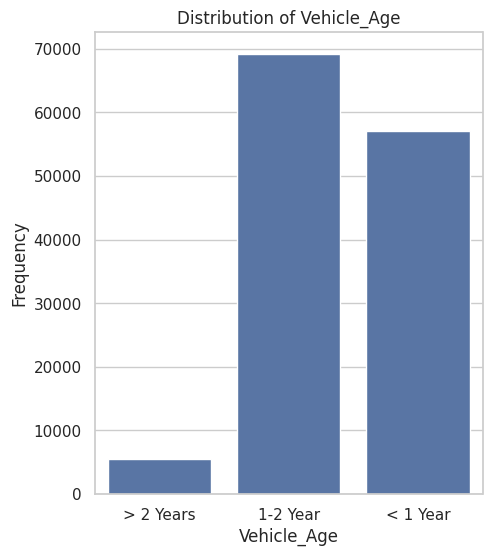

In [ ]:
plt.figure(figsize=(5, 6))
sns.countplot(x = 'Vehicle_Age', data=df)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

In [44]:
def veh_a(Vehicle_Damage):
  if Vehicle_Damage == 'Yes':
    return 1
  else:
    return 0

def veh_age(x) :
    if x == '< 1 Year' :
        return 0
    elif x == '1-2 Year' :
        return 1
    elif x == '> 2 Years' :
        return 2

df['Vehicle_Age'] = df['Vehicle_Age'].apply(veh_age)

df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(veh_a)

df['Gender'] = (df['Gender'] == 'Male').astype(int)

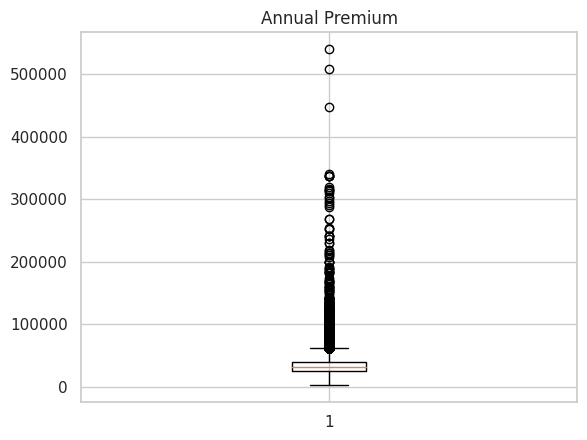

In [ ]:
plt.boxplot(df['Annual_Premium'])
plt.title('Annual Premium')
plt.show()

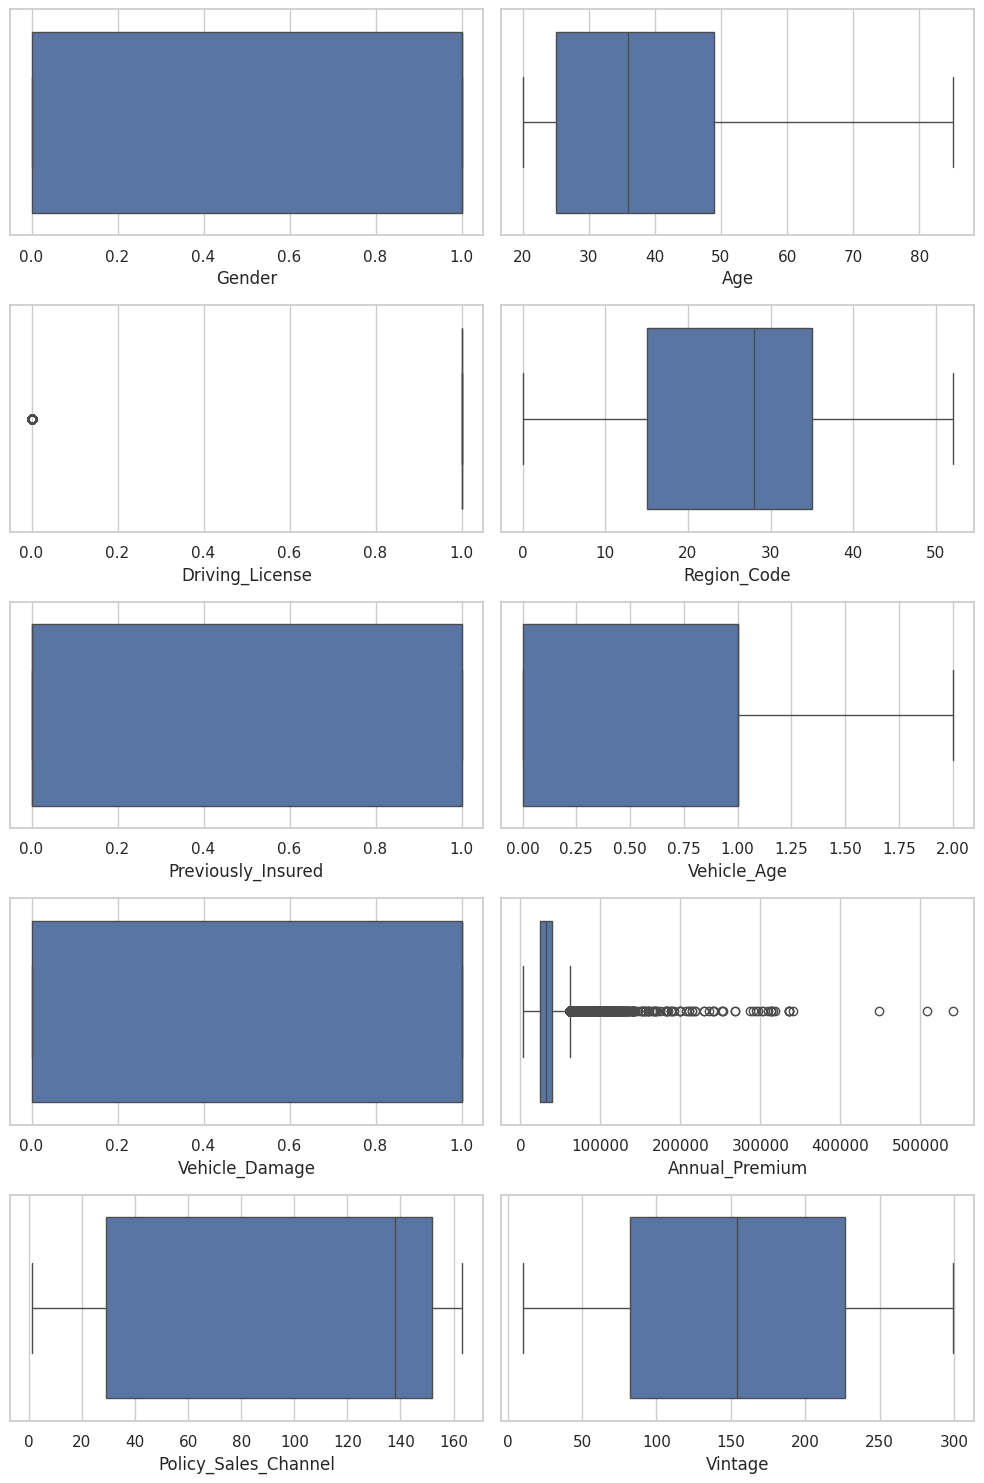

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(10, 15))
ax = ax.ravel()
for col, ax in zip(df.columns[:-1], ax):
    sns.boxplot(x=df[col], ax=ax)
plt.tight_layout()
plt.show()

In [45]:
# Using IQR to identify and cap/extreme values
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Annual_Premium'] = df['Annual_Premium'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


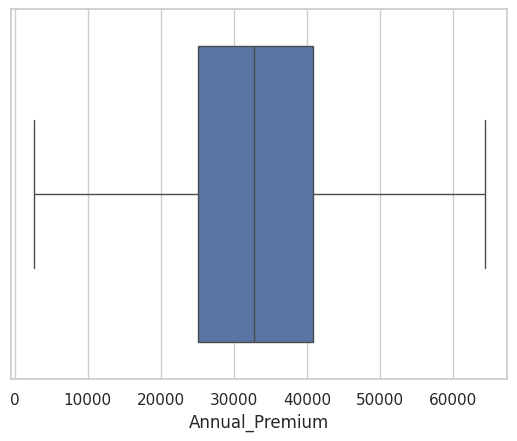

In [ ]:
sns.boxplot(x=df['Annual_Premium'])
plt.show()

In [46]:
df.drop(['id'], axis=1, inplace=True)

<Axes: >

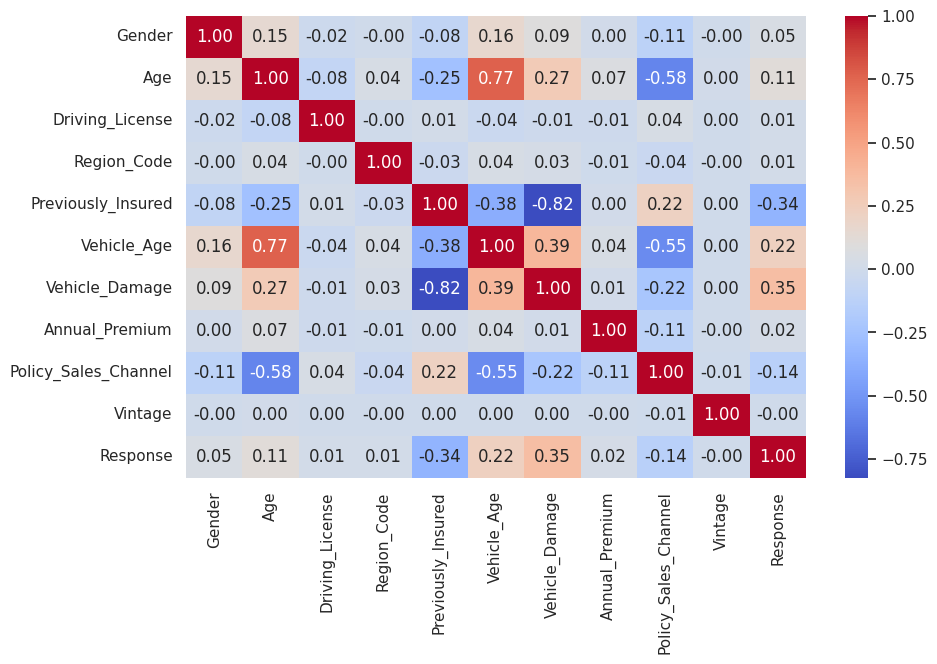

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

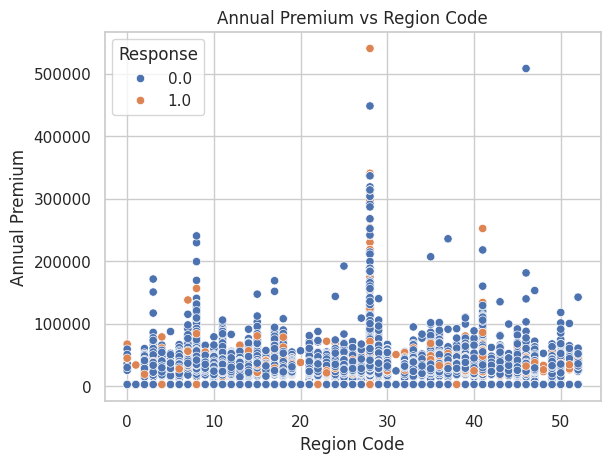

In [ ]:
sns.scatterplot(x='Region_Code', y='Annual_Premium', hue='Response', data=df)
plt.title('Annual Premium vs Region Code')
plt.xlabel('Region Code')
plt.ylabel('Annual Premium')
plt.show()

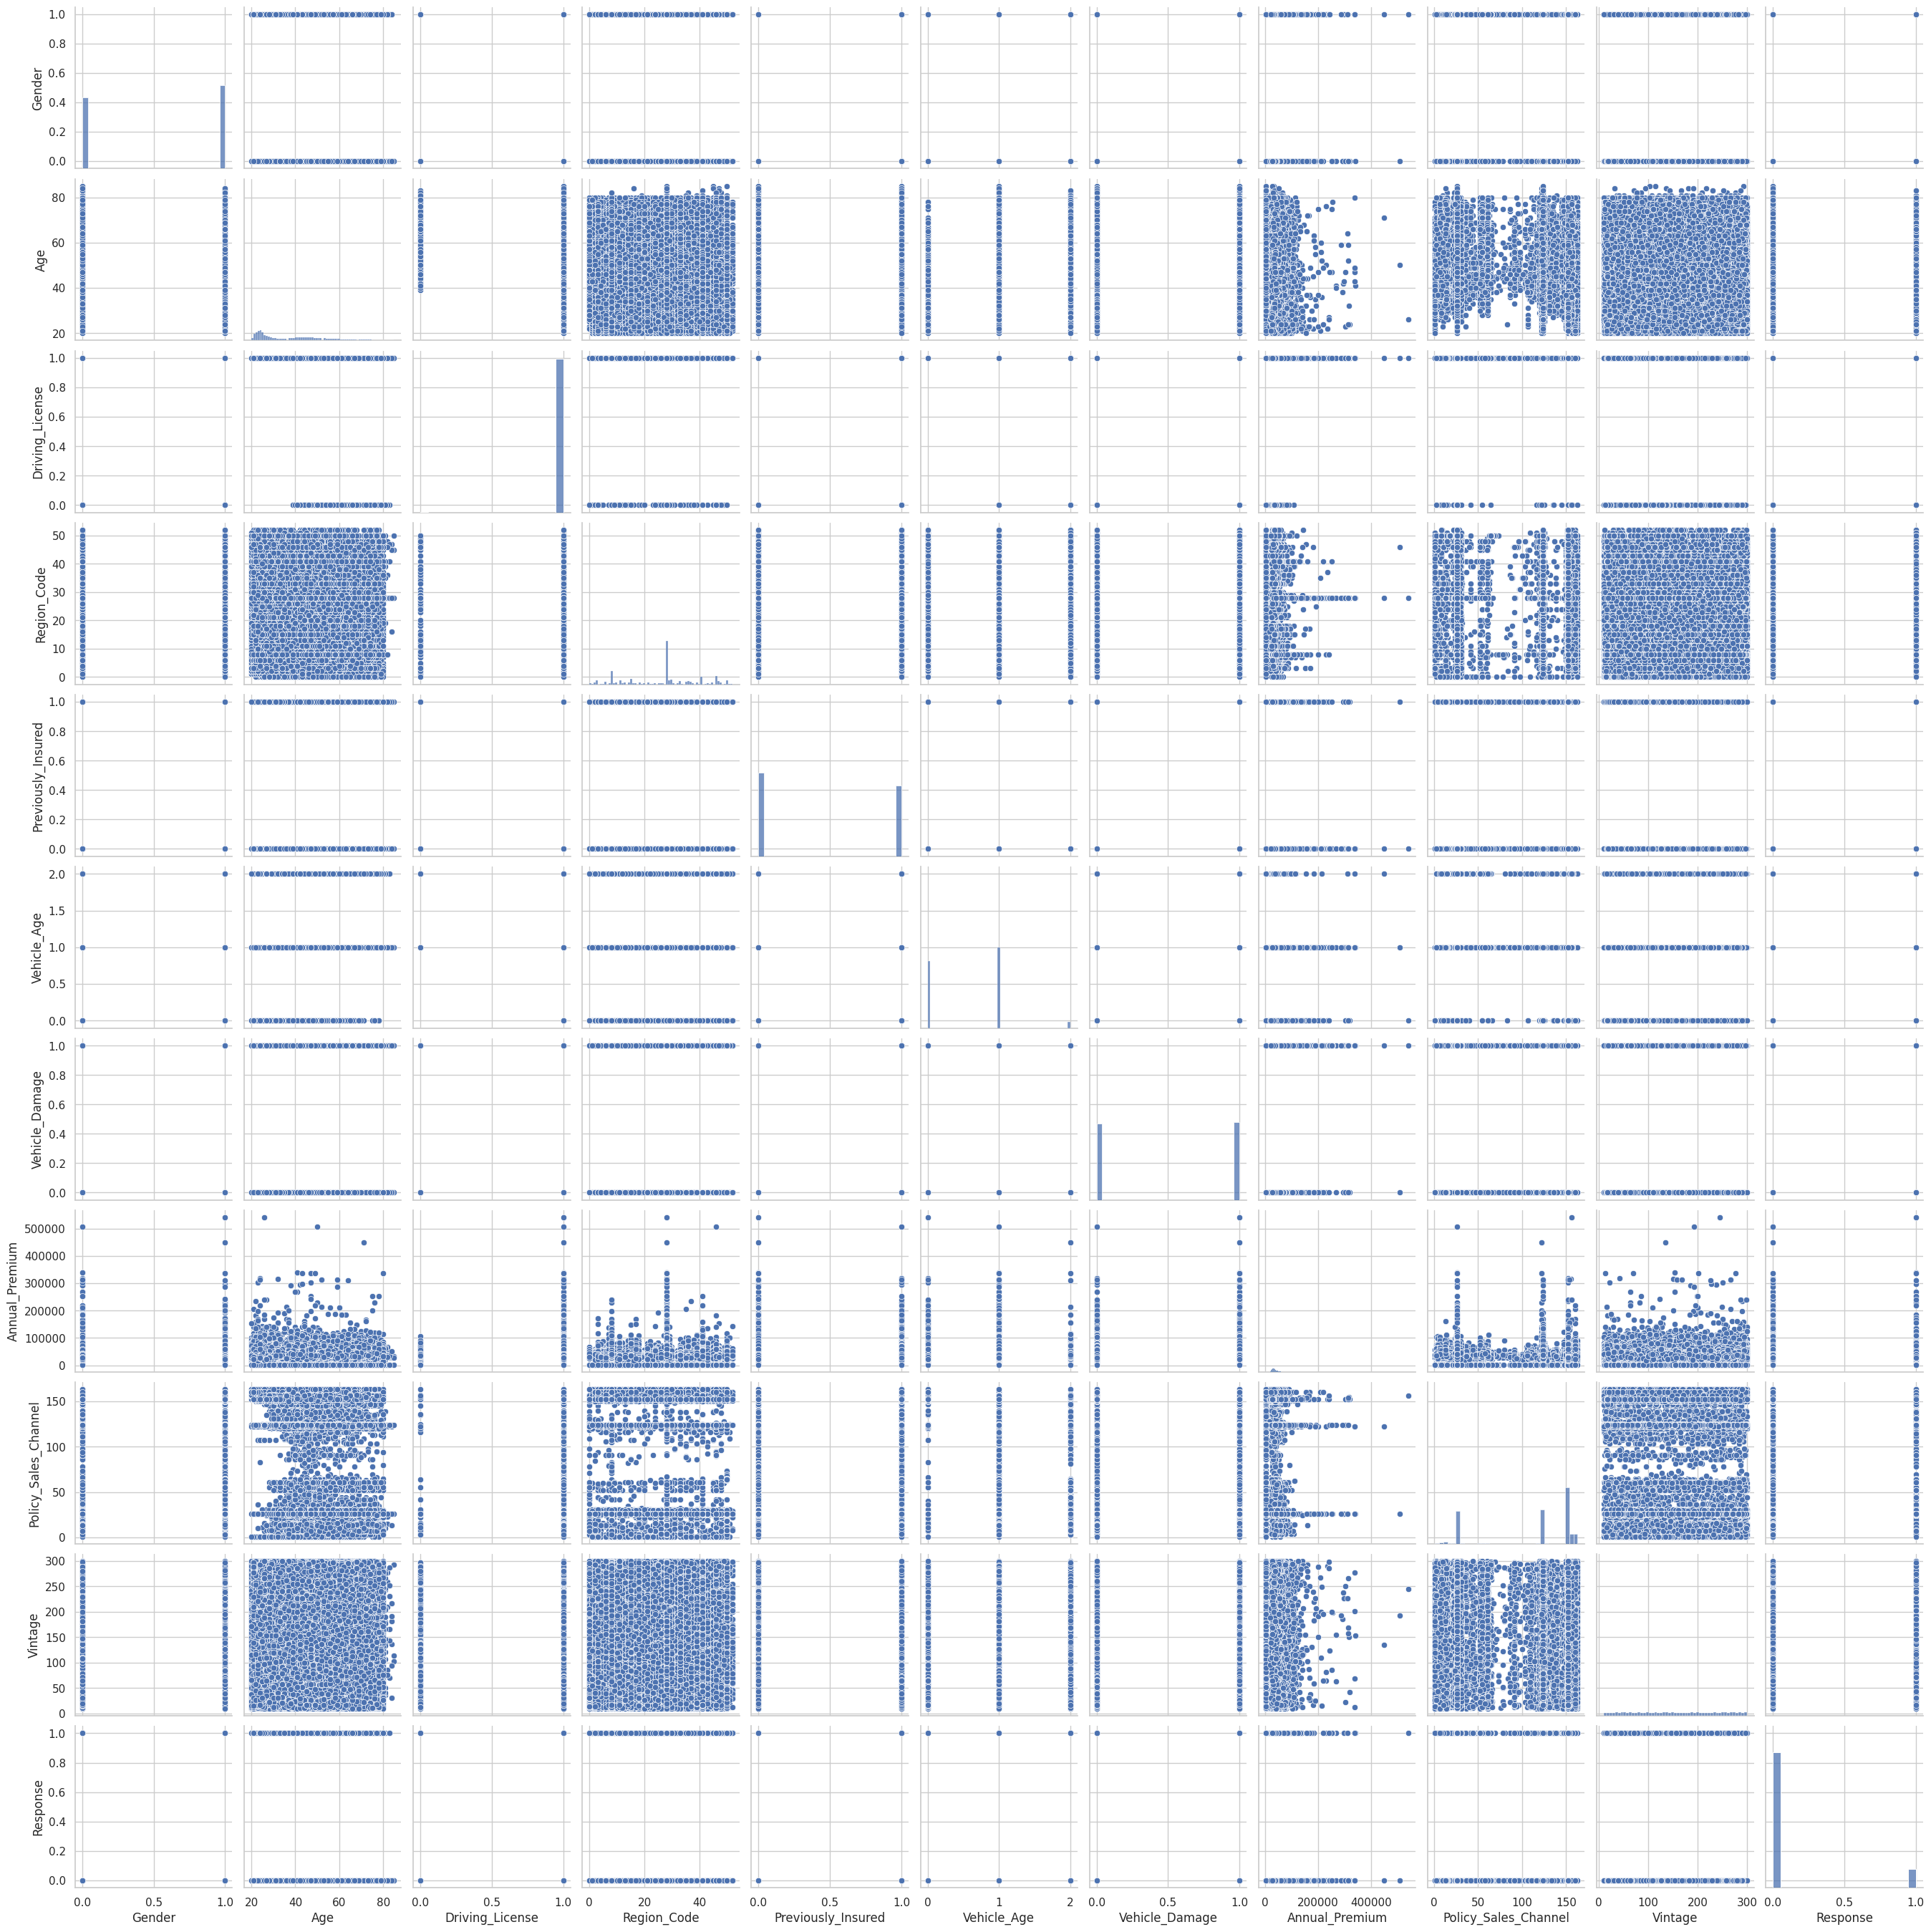

In [ ]:
sns.pairplot(df)

In [47]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,1796168.0,0.599102,0.490081,0.0,0.0,1.0,1.0,1.0
Age,1796168.0,42.328993,12.575649,20.0,33.0,43.0,50.0,85.0
Driving_License,1796168.0,0.998849,0.033904,0.0,1.0,1.0,1.0,1.0
Region_Code,1796168.0,26.762622,11.723592,0.0,21.0,28.0,30.0,52.0
Previously_Insured,1796168.0,0.099115,0.298817,0.0,0.0,0.0,0.0,1.0
Vehicle_Age,1796168.0,0.880473,0.531246,0.0,1.0,1.0,1.0,2.0
Vehicle_Damage,1796168.0,0.881572,0.323115,0.0,1.0,1.0,1.0,1.0
Annual_Premium,1796168.0,31428.108520,16599.253623,2630.0,25563.0,33510.0,42196.0,67145.5
Policy_Sales_Channel,1796168.0,94.980698,56.252707,1.0,26.0,124.0,152.0,163.0
Vintage,1796168.0,159.317854,80.007891,10.0,95.0,161.0,226.0,299.0


In [48]:
X = df.drop(['Response'], axis = 1)
y = df['Response']

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transformed = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [51]:
y_train.value_counts()

Response
1    1169500
0     267434
Name: count, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [53]:
y_train_resampled.value_counts()

Response
1    1169500
0    1169500
Name: count, dtype: int64

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()

In [56]:
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [57]:
lr.score(X_test, y_test)

0.9067515881013489

In [58]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.59      0.70     66965
           1       0.91      0.98      0.94    292269

    accuracy                           0.91    359234
   macro avg       0.89      0.79      0.82    359234
weighted avg       0.90      0.91      0.90    359234



In [59]:
import pickle

In [32]:
pickle.dump(lr, open('model.pkl', 'wb'))

In [78]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [61]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [72]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
for row in df.itertuples():
    if row.Response == 1:
        continue
    sv = scaler.transform([list(row[1:-1])])
    pred = lr.predict(sv)
    print(row[0], pred)
    if pred[0] == 0:
        print(row)
        break

1 [0]
Pandas(Index=1, Gender=1, Age=76, Driving_License=1, Region_Code=3.0, Previously_Insured=0, Vehicle_Age=1, Vehicle_Damage=0, Annual_Premium=33536.0, Policy_Sales_Channel=26.0, Vintage=183, Response=0)


In [63]:
temp = [1, 44, 1, 28, 0, 2, 1, 40454, 26, 217]

In [80]:
scaler.transform([temp])

array([[ 0.81802577,  0.13287643,  0.03394273,  0.10554602, -0.33169285,
         2.10735994,  0.36652093,  0.543753  , -1.22626485,  0.72095591]])

In [81]:
lr.predict([temp])

array([1])

In [91]:
temp1 = [1, 76, 1, 3, 0, 1, 0, 33536, 26, 183]
temp1 = scaler.transform([temp1])
lr.predict(temp1)

array([0])

In [60]:
rf.fit(X_train_resampled, y_train_resampled)

KeyboardInterrupt: 

In [ ]:
rf.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, rf.predict(X_test)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [ ]:
dtc.score(X_test, y_test)

0.7436212887646994

In [ ]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71     67012
         1.0       0.78      0.76      0.77     85801

    accuracy                           0.74    152813
   macro avg       0.74      0.74      0.74    152813
weighted avg       0.74      0.74      0.74    152813



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

0.7794690242322315

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='precision', verbose=3)

In [ ]:
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.742 total time= 1.5min
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.741 total time= 1.4min
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.741 total time= 1.4min
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.743 total time= 3.0min
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.741 total time= 2.8min
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.741 total time= 2.7min
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.742 total time= 1.5min
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.741 total time= 1.

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='precision', verbose=3)

In [ ]:
pipelines = [lr, rf, dtc]
pipeline_names = ['Logistic Regression', 'RandomForestClassifier', 'Decision Tree Classifier']

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

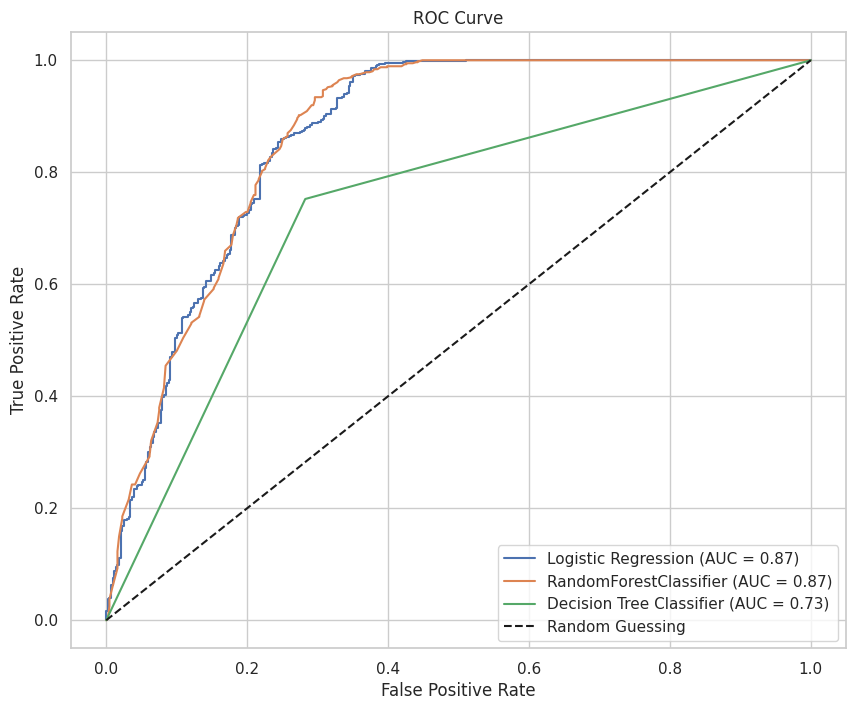

In [ ]:
plt.figure(figsize=(10, 8))

for pipe, name in zip(pipelines, pipeline_names):
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.predict_proba(X_test[:1000])[:, 1]
    fpr, tpr, _ = roc_curve(y_test[:1000], y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test[:1000], y_pred_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()